In [6]:
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix


In [7]:
from sklearn.model_selection import train_test_split


数据预处理：  
-了解样本正负分布
-缺失值，连续值等补全

In [9]:
data = pd.read_csv('train.csv',header=None)
dataset = data[list(range(10))].values
labels = data[10].values

(array([6111.,  369.]), array([-1.,  0.,  1.]), <a list of 2 Patch objects>)

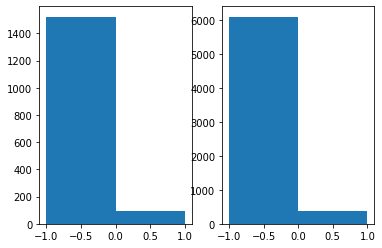

In [10]:
# 分割数据集，并且两个数据集里面正负样本的分布是否一致
X_trian, X_val, Y_train, Y_val = train_test_split(dataset, labels, test_size=0.2, shuffle=True)
plt.subplot(121)
plt.hist(Y_val, bins=2)
plt.subplot(122)
plt.hist(Y_train, bins=2 )

Confusion matrix:
[[1433   91]
 [  83   13]]
              precision    recall  f1-score   support

          -1    0.94525   0.94029   0.94276      1524
           1    0.12500   0.13542   0.13000        96

    accuracy                        0.89259      1620
   macro avg    0.53513   0.53785   0.53638      1620
weighted avg    0.89664   0.89259   0.89460      1620

auc:0.5407576006124234


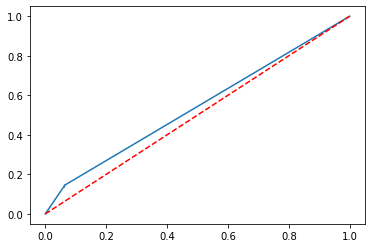

In [17]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_trian, Y_train)

y_pred = dt_clf.predict(X_val)

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = dt_clf.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

print('auc:{}'.format(auc(fpr, tpr)))

In [18]:
# 特征的重要性
dt_clf.feature_importances_

array([0.4008888 , 0.46740389, 0.03083836, 0.01257468, 0.03665494,
       0.        , 0.02621863, 0.00425152, 0.02014516, 0.00102401])

Confusion matrix:
[[1430   94]
 [  78   18]]
              precision    recall  f1-score   support

          -1    0.94828   0.93832   0.94327      1524
           1    0.16071   0.18750   0.17308        96

    accuracy                        0.89383      1620
   macro avg    0.55450   0.56291   0.55817      1620
weighted avg    0.90161   0.89383   0.89763      1620

auc:0.5629716207349081


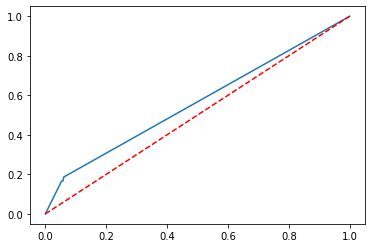

In [19]:
# 增加少样本权重，重新训练决策树
ratio = 6109/371
sample_weights = np.ones_like(Y_train, dtype=np.float)
sample_weights[Y_train==-1]=1
sample_weights[Y_train==1]=ratio

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_trian, Y_train, sample_weight=sample_weights)

y_pred = dt_clf.predict(X_val)
print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = dt_clf.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

print('auc:{}'.format(auc(fpr, tpr)))


Confusion matrix:
[[1502   21]
 [  92    5]]
              precision    recall  f1-score   support

          -1       0.94      0.99      0.96      1523
           1       0.19      0.05      0.08        97

    accuracy                           0.93      1620
   macro avg       0.57      0.52      0.52      1620
weighted avg       0.90      0.93      0.91      1620

auc:0.6253392991315295


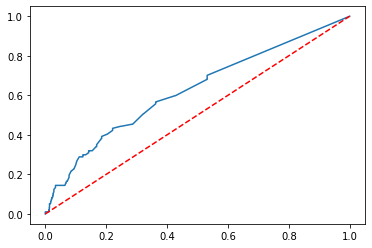

In [15]:
# 采用样本加权的随机森林
from sklearn.ensemble import RandomForestClassifier

# ratio = 6109/371
# sample_weights = np.ones_like(Y_train, dtype=np.float)
# sample_weights[Y_train==-1]=1
# sample_weights[Y_train==1]=ratio

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf = rf_clf.fit(X_trian, Y_train)

# rf_clf = rf_clf.fit(X_trian, Y_train, sample_weight=sample_weights)

y_pred = rf_clf.predict(X_val)

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
rf_report = classification_report(Y_val, y_pred)
print(rf_report)

# auc
y_probas = rf_clf.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

rf_auc=auc(fpr, tpr)
print('auc:{}'.format(rf_auc))

Confusion matrix:
[[1521    2]
 [  96    1]]
              precision    recall  f1-score   support

          -1    0.94063   0.99869   0.96879      1523
           1    0.33333   0.01031   0.02000        97

    accuracy                        0.93951      1620
   macro avg    0.63698   0.50450   0.49439      1620
weighted avg    0.90427   0.93951   0.91198      1620

auc:0.6501140586606737


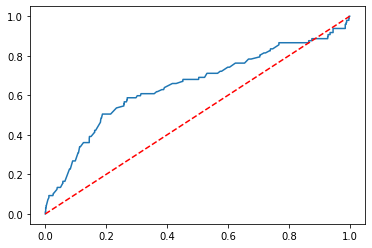

In [14]:
#使用adaboost方法 
from sklearn.ensemble import AdaBoostClassifier

# ratio = 6109/371
# sample_weights = np.ones_like(Y_train, dtype=np.float)
# sample_weights[Y_train==-1]=1
# sample_weights[Y_train==1]=ratio

ada = AdaBoostClassifier(n_estimators=175)
# 此处使用加权
# ada.fit(X_trian, Y_train, sample_weight= sample_weights)
ada.fit(X_trian, Y_train)
y_pred = ada.predict(X_val)

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = ada.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

ada_auc=auc(fpr, tpr)
print('auc:{}'.format(ada_auc))
# 发现对少样本进行加权，会使得
# 少样本的召回率明显提高（0.99803-->0.6631），多样本的召回率会下降（0.0059-->0.7055)
# 少样本精度：0.5-->0.123； 多样本精度：0.943-->0.871
# auc也降低了：0.72619-->0.720
# 采用样本加权貌似没什么用，因为adaboost本身就会调节样本的权重


In [23]:
ada.feature_importances_

array([0.36571429, 0.25142857, 0.09714286, 0.06857143, 0.04      ,
       0.        , 0.03428571, 0.02857143, 0.08571429, 0.02857143])

Confusion matrix:
[[1524    0]
 [  95    1]]
              precision    recall  f1-score   support

          -1    0.94132   1.00000   0.96977      1524
           1    1.00000   0.01042   0.02062        96

    accuracy                        0.94136      1620
   macro avg    0.97066   0.50521   0.49520      1620
weighted avg    0.94480   0.94136   0.91353      1620

auc:0.7457759186351706


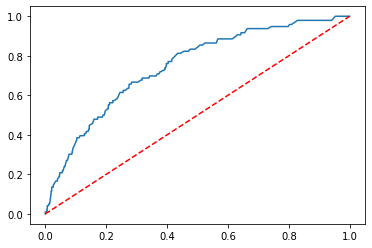

In [24]:
# 使用xgboost
from xgboost import XGBClassifier

xgb_cls = XGBClassifier()
xgb_cls.fit(X_trian, Y_train) 
y_pred = xgb_cls.predict(X_val)

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = xgb_cls.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

xgb_auc=auc(fpr, tpr)
print('auc:{}'.format(xgb_auc))

In [25]:
from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(hidden_layer_sizes=(64,32,16), activation='tanh', solver='adam', alpha=0.05, batch_size=32)

clf = BalancedBaggingClassifier(clf,n_estimators=5,max_samples=0.5,replacement=False,random_state=0)
y_pre = clf.predict(X_val)

y_probas = clf.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(Y_val, y_probas[:,1])
print('Confusion matrix:')
print(confusion_matrix(Y_val,y_pre))
print(classification_report(y, y_pre, digits=5))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')
print('auc:{}'.format(auc(fpr, tpr)))

In [28]:
y_pred.sum()

-1998